read in data

In [1]:
import numpy as np
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt
import pandas as pd
from pre_and_post_valuations_data import transaction_data_file, block_data_file, pre_geth_file, \
    geth_reccomendation_file, suite_spot_txn, suite_spot_blx, post_eip_oct_txn_file, \
    post_eip_oct_blx_file



#Read in the data, use your own machines specific path as you see fit
transaction_data=pd.read_csv(transaction_data_file)
block_data=pd.read_csv(block_data_file)
pre_geth=pd.read_csv(pre_geth_file)
geth_r=pd.read_csv(geth_reccomendation_file)
suite_txn=pd.read_csv(suite_spot_txn)
suite_blx=pd.read_csv(suite_spot_blx)
post_eip_oct_txn=pd.read_csv(post_eip_oct_txn_file)
post_eip_oct_blx=pd.read_csv(post_eip_oct_blx_file)

def random_index_generator(my_list,num_of_indexes):
    my_max=len(my_list)-1
    result=np.random.uniform(0,my_max,num_of_indexes)
    index=[round(x) for x in result]
    return [my_list[x] for x in index]

use previously written code to clean and combine the datasets

In [2]:

#######################################################################################################################
## ADDING THE GAS LIMITS AND BASE FEE INTO THE DATAFRAME
#######################################################################################################################
## first we put the gas limits as well as the base fee into the  transaction dataframe
#######################################################################################################################


#######################################################################################################################
## ADDING THE GAS LIMITS AND BASE FEE INTO THE DATAFRAME
#######################################################################################################################
## first we put the gas limits as well as the base fee into the  transaction dataframe
#######################################################################################################################





#Get the block number and gas limits and base fee from the dataset
my_block_number=list(block_data.block_number)
my_gas_limit=list(block_data.gas_limit)
my_base_fee=list(block_data.base_fee_per_gas)
#initialize a dictionary to assign gas limits and base fee to the transaction data
gas_limit_tracker={}
base_fee_tracker={}


#makes a dicionary with the key being the block number and the 
#value being the gas limits and base fee, because this will allow us to 
#easily assign a gas limit and base fee to the transaction going forward
for i in range(len(my_block_number)):
    gas_limit_tracker[my_block_number[i]]=my_gas_limit[i]
    base_fee_tracker[my_block_number[i]]=my_base_fee[i]
    
    
##get the block numbers from the transaction data
transaction_block_numbers=list(transaction_data.block_number)


#initialize a list for the purpose of saving the gas limits that will 
#be assigned to the transaction data and assign the correct information
gas_limits_for_transaction_data=[gas_limit_tracker[x] for x in transaction_block_numbers]
base_fee_for_transaction_data=[base_fee_tracker[x] for x in transaction_block_numbers]

    
#add the column into the dataframe
#transaction_data['gas_limit']=gas_limits_for_transaction_data
transaction_data['base_fee']=base_fee_for_transaction_data


# The final step is to remove the NA's from then dataframe, from testing of the 
# dataset, i have found that the max priority fee per gas and the max fee per gas
# have the the same number of NA's -this can be oberved with the line 
# np.sum(transaction_data.isna())- that we can remove the NA's with the line...
transaction_data=transaction_data[pd.notnull(transaction_data.max_fee_per_gas)]

In [3]:
display(transaction_data)

,hash,block_number,value,gas,gas_price,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_used,base_fee
77,0xb694a24da8824d6971cc9566a94a12eb4840744a41ff...,12965401,0.000000e+00,2000000,164476296532,2.477601e+11,6.950232e+10,2,655016,94973980561
113,0xd446779806b1d7872274d5a96d4467e19061f91afd08...,12965401,0.000000e+00,575000,137641981761,1.376420e+11,1.376420e+11,2,256690,94973980561
131,0xcacc3b9c1183d295035426cad5f2b3c3592d6f5bc8bc...,12965401,0.000000e+00,600000,117000000000,1.170000e+11,1.170000e+11,2,228615,94973980561
139,0xb5e82901711d56cc1ed71b53bedab13f736a147f1aec...,12965401,9.000000e+16,181878,114492439218,2.227327e+11,1.951846e+10,2,180284,94973980561
161,0xa8cb186ede094e2bc472aceb64ff8a9a53da4becc67f...,12965401,0.000000e+00,21000,107102601947,2.210714e+11,1.212862e+10,2,21000,94973980561
...,...,...,...,...,...,...,...,...,...,...
883769,0xec1a176e7a2cc37389bf2ff27a169a240f1734c33a08...,12969997,2.804744e+16,3000000,29635881520,2.963588e+10,0.000000e+00,2,121233,29635881520
883770,0x31eca90accfcb17e2d85dfc6418d420988067bf856e6...,12969997,0.000000e+00,1000000,34505402509,3.450540e+10,3.450540e+10,2,210545,29635881520
883837,0xfa623209d41ba4409537b5739d4fa0abbefd687313c2...,12969997,4.109970e+15,42000,31502952651,3.150295e+10,1.867071e+09,2,21000,29635881520
883853,0xeb54da76c9059da24af786d1dc97f76da7faebbc9e97...,12969998,0.000000e+00,1000000,165487905007,1.654879e+11,1.654879e+11,2,122846,28080959215


In [4]:
#grab the block numbers from the dataset
my_blocks=list(set(list(transaction_data.block_number)))


#grab the usable block numbers, as we cant derive reccomendations from the 
#first 100 blocks because the reccomendation is based on the previous 100 
#blocks
usable_blocks=my_blocks[101:]
#get the first block
usable_blocks[0]




#initialize a list to contain the minimum
min_list=[]

#this loop goes through each of the 
#usable blocks, finds the lowest rescaled gas price, 
#then gets the bid associated with that
#gas price, and then adds it to the min_list
for i in my_blocks:        
    current_itteration=transaction_data[transaction_data.block_number == i]
    tip_values=list(current_itteration.max_priority_fee_per_gas)
    min_value=np.min(tip_values)
    min_list.append(min_value)
    
        
        
        
#initialize a list to contain the geth reccomendations
geth_reccomendation=[]


for i in range(len(usable_blocks)):
    geth_reccomendation.append(np.percentile(min_list[i:i+100],60))

    
#use only the usable blocks for our final dataframe  
final_dataframe_d1=transaction_data[transaction_data.block_number >= usable_blocks[0]]


#initialize a dictionary to contain the geth reccomendations
geth_r_tracker={}

#assign the values based on the block number
for i in range(len(usable_blocks)):
    geth_r_tracker[usable_blocks[i]]=geth_reccomendation[i]
    
    
#get the blocks from the dataframe
my_final_blocks=list(final_dataframe_d1.block_number)

#initialize a list that will contain the geth reccomendation
geth_r_for_dataframe=[]

#assign the ressomendation
for i in my_final_blocks:
    geth_r_for_dataframe.append(geth_r_tracker[i])
    
#put the reccomendation back into the dataframe
final_dataframe_d1['geth_recommendation_tip']=geth_r_for_dataframe


#calculate the valuations according to the methodology of the 
#last paper
final_dataframe_d1['valuations_tip']=final_dataframe_d1['max_priority_fee_per_gas']  \
/ final_dataframe_d1['geth_recommendation_tip']

final_dataframe_d1['geth_recommendation_max_fee']= \
final_dataframe_d1['geth_recommendation_tip'] + \
2 * final_dataframe_d1['base_fee']

final_dataframe_d1['valuations_max_fee']=final_dataframe_d1['max_fee_per_gas'] \
/ final_dataframe_d1['geth_recommendation_max_fee']


#display the results to the user
display(final_dataframe_d1)

/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_4273/2709876947.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe_d1['geth_recommendation_tip']=geth_r_for_dataframe
/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_4273/2709876947.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe_d1['valuations_tip']=final_dataframe_d1['max_priority_fee_per_gas']  \
/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_4273/2709876947.py:70: SettingWithCopyWarni

,hash,block_number,value,gas,gas_price,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_used,base_fee,geth_recommendation_tip,valuations_tip,geth_recommendation_max_fee,valuations_max_fee
516516,0x4ecc6a513ce1c02e1367c7bca169233d7da61a721d54...,12968054,0.000000e+00,120000,40658350000,4.065835e+10,4.065835e+10,2,43713,34209998215,4.011818e+09,10.134645,7.243181e+10,0.561333
516524,0x9128b87ba28e3bdbb40491ea5d3ec4fffd9bdf24638e...,12968054,0.000000e+00,250000,39209998215,7.200000e+10,5.000000e+09,2,57206,34209998215,4.011818e+09,1.246318,7.243181e+10,0.994038
516787,0x49d63c1b486c0f99c05a5ab4970919684fb23b056c12...,12968055,5.000000e+16,211131,40107493816,4.010749e+10,4.010749e+10,2,201299,32526865584,4.011818e+09,9.997337,6.906555e+10,0.580716
516859,0x865c8eedc70ff15750ced3ed0d714bf8eb440ddd9e33...,12968055,7.075910e+15,21000,36526865584,7.800000e+10,4.000000e+09,2,21000,32526865584,4.011818e+09,0.997054,6.906555e+10,1.129362
516903,0x27d26ab8a6a69e82e4b50e899622e7d193bdb097119c...,12968055,0.000000e+00,362127,35050243944,3.505024e+10,3.505024e+10,2,212973,32526865584,4.011818e+09,8.736749,6.906555e+10,0.507492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883769,0xec1a176e7a2cc37389bf2ff27a169a240f1734c33a08...,12969997,2.804744e+16,3000000,29635881520,2.963588e+10,0.000000e+00,2,121233,29635881520,4.000000e+09,0.000000,6.327176e+10,0.468390
883770,0x31eca90accfcb17e2d85dfc6418d420988067bf856e6...,12969997,0.000000e+00,1000000,34505402509,3.450540e+10,3.450540e+10,2,210545,29635881520,4.000000e+09,8.626351,6.327176e+10,0.545352
883837,0xfa623209d41ba4409537b5739d4fa0abbefd687313c2...,12969997,4.109970e+15,42000,31502952651,3.150295e+10,1.867071e+09,2,21000,29635881520,4.000000e+09,0.466768,6.327176e+10,0.497899
883853,0xeb54da76c9059da24af786d1dc97f76da7faebbc9e97...,12969998,0.000000e+00,1000000,165487905007,1.654879e+11,1.654879e+11,2,122846,28080959215,4.000000e+09,41.371976,6.016192e+10,2.750709


In [5]:




post_eip_oct_txn=post_eip_oct_txn[pd.notnull(post_eip_oct_txn.max_priority_fee_per_gas)]
display(post_eip_oct_txn)







#grab the block numbers from the dataset
my_blocks=list(set(list(post_eip_oct_txn.block_number)))


#grab the usable block numbers, as we cant derive reccomendations from the 
#first 100 blocks because the reccomendation is based on the previous 100 
#blocks
usable_blocks=my_blocks[101:]
#get the first block
usable_blocks[0]




#initialize a list to contain the minimum
min_list=[]

#this loop goes through each of the 
#usable blocks, finds the lowest rescaled gas price, 
#then gets the bid associated with that
#gas price, and then adds it to the min_list
for i in my_blocks:        
    current_itteration=post_eip_oct_txn[post_eip_oct_txn.block_number == i]
    tip_values=list(current_itteration.max_priority_fee_per_gas)
    min_value=np.min(tip_values)
    min_list.append(min_value)
    
        
        
        
#initialize a list to contain the geth reccomendations
geth_reccomendation=[]


for i in range(len(usable_blocks)):
    geth_reccomendation.append(np.percentile(min_list[i:i+100],60))

    
#use only the usable blocks for our final dataframe  
final_dataframe_oct=post_eip_oct_txn[post_eip_oct_txn.block_number >= usable_blocks[0]]


#initialize a dictionary to contain the geth reccomendations
geth_r_tracker={}

#assign the values based on the block number
for i in range(len(usable_blocks)):
    geth_r_tracker[usable_blocks[i]]=geth_reccomendation[i]
    
    
#get the blocks from the dataframe
my_final_blocks=list(final_dataframe_oct.block_number)

#initialize a list that will contain the geth reccomendation
geth_r_for_dataframe=[]

#assign the ressomendation
for i in my_final_blocks:
    geth_r_for_dataframe.append(geth_r_tracker[i])
    
#put the reccomendation back into the dataframe
final_dataframe_oct['geth_recommendation_tip']=geth_r_for_dataframe
final_dataframe_oct['geth_recommendation_tip_plus']= \
final_dataframe_oct['geth_recommendation_tip']+1

final_dataframe_oct['max_priority_fee_per_gas_plus']=\
final_dataframe_oct['max_priority_fee_per_gas']+1



final_dataframe_oct['tip_valuations']=final_dataframe_oct['max_priority_fee_per_gas_plus'] \
/final_dataframe_oct['geth_recommendation_tip_plus']

final_dataframe_oct=final_dataframe_oct[pd.notnull(final_dataframe_oct.tip_valuations)]

display(final_dataframe_oct)

#len(set(final_dataframe_oct.geth_recommendation_tip))

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
4,0x11e5a4d21139c7a0de556f791ebc0f10c273cec96efc...,270208,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,4,0x5ab9d116a53ef41063e3eae26a7ebe736720e9ba,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0,250000,185000000000,0x38ed1739000000000000000000000000000000000000...,1633451105,1.850000e+11,7.000000e+10,2
5,0xaeefeffd8eab02be8ffa5b1e3f8acf83855ac4a3567f...,55,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,5,0x204a731a626438a0b2a657378668cfbfe70a90f5,0x96f47d56f25d2ba629db1f55db0517dee67640e1,0,119876,181726253573,0x6a76120200000000000000000000000001fdc62ff435...,1633451105,1.817263e+11,7.733000e+10,2
6,0x568fd3a753000ce8b00651daaff922533afc06e7e355...,2760623,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,6,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,0x1e852c5bbe4c7cda0ccac3c4561db6cc9bc39eb9,59104921050000000000,21000,162831880856,0x,1633451105,2.820000e+11,4.000000e+09,2
7,0x06190ba28039040ac4d79daff31a32f958937414d474...,3042959,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,7,0x3cd751e6b0078be393132286c442345e5dc49699,0xac4c7b2c36f4beed0963eef8215b2fa9bc9be15d,29210120000000000,21000,162831880856,0x,1633451105,2.820000e+11,4.000000e+09,2
8,0x07796eaca8cbf3b748305cf26214c99ffe5d043157a2...,3042960,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,8,0x3cd751e6b0078be393132286c442345e5dc49699,0xdac17f958d2ee523a2206206994597c13d831ec7,0,250000,162831880856,0xa9059cbb000000000000000000000000ae31986171da...,1633451105,2.820000e+11,4.000000e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965764,0x0762560fa72fdb7b92a905b260581b017a8c9ce22d11...,113,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,262,0x41c8730c4a8a07d523e25f80c9b477337e16fa9c,0xa4dc59bae0ca1a0e52dac1885199a2fb53b3abe3,0,45000,100976098829,0x3e12170f000000000000000000000000d8aa5ed74e5a...,1633518046,1.089530e+11,1.410000e+09,2
965766,0x027bab6777af58610e94f4a5d8bafae9d923646bda11...,425,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,264,0x26b3eea1cd34a4aff7ce828a5f71daac042d38e0,0x6ad567e7d23787cbc025f168a102fb394e5a85b0,271499366019297752,21000,100712231644,0x,1633518046,1.915743e+11,1.146133e+09,2
965769,0xfb608435b14860a8a7cc52f648d58bd32d58515f376b...,484,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,267,0x88004a0f6e7dfc2ef21c49b614eb0a3569e29525,0x9757f2d2b135150bbeb65308d4a91804107cd8d6,287000000000000000,327208,100654122220,0xe99a3f80000000000000000000000000000000000000...,1633518046,1.006541e+11,1.006541e+11,2
965770,0xa6e0986b89ca14e87572ca5ae467473221e2ed4a04d2...,312,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,268,0x88aa631b427cf96d12d91885e7026a3636d90070,0x9757f2d2b135150bbeb65308d4a91804107cd8d6,789250000000000000,327208,100654122220,0xe99a3f80000000000000000000000000000000000000...,1633518046,1.006541e+11,1.006541e+11,2


/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_4273/166651678.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe_oct['geth_recommendation_tip']=geth_r_for_dataframe
/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_4273/166651678.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe_oct['geth_recommendation_tip_plus']= \
/var/folders/l8/p0_hwx4d2hvbqs4crpsfjlzc0000gn/T/ipykernel_4273/166651678.py:75: SettingWithCopyWarning: 
A value is trying to be set o

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,geth_recommendation_tip,geth_recommendation_tip_plus,max_priority_fee_per_gas_plus,tip_valuations
194973,0xbcf02e2b7cb43fce05a8a3b8dd3010f87f5397395db7...,21458,0x538cadb95f3c382f3b6ad099c14f91c49aad90e20bce...,13361254,0,0x56f03dbc2d16f4a252a7176e1fc3f05b53c6aad5,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf,0,1200000,92954071090,0x1cff79cd000000000000000000000000aa2ec16d77cf...,1633466693,1.930858e+11,0.000000e+00,2,1.000000e+09,1.000000e+09,1.000000e+00,1.000000e-09
194974,0xce50ae32512398b5fc22e983179ab96cd68ba457a6df...,726,0x538cadb95f3c382f3b6ad099c14f91c49aad90e20bce...,13361254,1,0x5ea20f5865a1334cceea6d1bc674a7699c7752e7,0x000000000755567f4924bf483bdf5a53ebc8ef64,0,220323,138215999253,0x000000a0cbe06695ad61b0a150d79219dcf64e1e6cc0...,1633466693,1.382160e+11,1.382160e+11,2,1.000000e+09,1.000000e+09,1.382160e+11,1.382160e+02
194975,0x5190d7201ed8437220f3bcfa3ff4ee1b79a5374abaf5...,11127,0x538cadb95f3c382f3b6ad099c14f91c49aad90e20bce...,13361254,2,0xb58555fcba6479fced7de1485eb054943a09af7b,0x00000000003b3cc22af3ae1eac0440bcee416b40,0,2000000,92954071090,0x0300cbe0667685cd3ddd862b8745b1082a6acb19e14e...,1633466693,9.295407e+10,0.000000e+00,2,1.000000e+09,1.000000e+09,1.000000e+00,1.000000e-09
194976,0xa80d2669e4bbbc2604f0251a70362bda450534be1fe2...,553,0x538cadb95f3c382f3b6ad099c14f91c49aad90e20bce...,13361254,3,0x8552aa9db5bcaa56d41411a4800309d7d0d35e36,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0,266000,155000000000,0x0f3b31b2000000000000000000000000000000000000...,1633466693,1.550000e+11,1.550000e+11,2,1.000000e+09,1.000000e+09,1.550000e+11,1.550000e+02
194977,0x8fa96b9ce51a2c0248c2491e98290a8611d92299a328...,11128,0x538cadb95f3c382f3b6ad099c14f91c49aad90e20bce...,13361254,4,0xb58555fcba6479fced7de1485eb054943a09af7b,0x00000000003b3cc22af3ae1eac0440bcee416b40,0,2000000,242480518145,0x0400cbe066ba5bde662c17e2adff1075610382b9b691...,1633466693,2.424805e+11,2.424805e+11,2,1.000000e+09,1.000000e+09,2.424805e+11,2.424805e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965764,0x0762560fa72fdb7b92a905b260581b017a8c9ce22d11...,113,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,262,0x41c8730c4a8a07d523e25f80c9b477337e16fa9c,0xa4dc59bae0ca1a0e52dac1885199a2fb53b3abe3,0,45000,100976098829,0x3e12170f000000000000000000000000d8aa5ed74e5a...,1633518046,1.089530e+11,1.410000e+09,2,1.000000e+09,1.000000e+09,1.410000e+09,1.410000e+00
965766,0x027bab6777af58610e94f4a5d8bafae9d923646bda11...,425,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,264,0x26b3eea1cd34a4aff7ce828a5f71daac042d38e0,0x6ad567e7d23787cbc025f168a102fb394e5a85b0,271499366019297752,21000,100712231644,0x,1633518046,1.915743e+11,1.146133e+09,2,1.000000e+09,1.000000e+09,1.146133e+09,1.146133e+00
965769,0xfb608435b14860a8a7cc52f648d58bd32d58515f376b...,484,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,267,0x88004a0f6e7dfc2ef21c49b614eb0a3569e29525,0x9757f2d2b135150bbeb65308d4a91804107cd8d6,287000000000000000,327208,100654122220,0xe99a3f80000000000000000000000000000000000000...,1633518046,1.006541e+11,1.006541e+11,2,1.000000e+09,1.000000e+09,1.006541e+11,1.006541e+02
965770,0xa6e0986b89ca14e87572ca5ae467473221e2ed4a04d2...,312,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,268,0x88aa631b427cf96d12d91885e7026a3636d90070,0x9757f2d2b135150bbeb65308d4a91804107cd8d6,789250000000000000,327208,100654122220,0xe99a3f80000000000000000000000000000000000000...,1633518046,1.006541e+11,1.006541e+11,2,1.000000e+09,1.000000e+09,1.006541e+11,1.006541e+02


12085

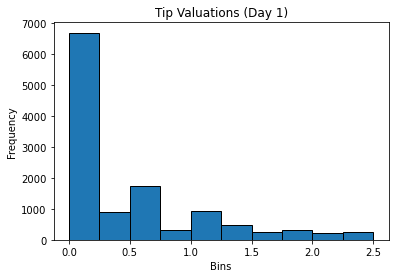

In [6]:

my_tips_val=list(final_dataframe_d1.valuations_tip)
tip_hi=np.percentile(my_tips_val,90)
tip_lo=np.percentile(my_tips_val,10)
my_tips_val=[x for x in my_tips_val if (x < tip_hi) & (x > tip_lo)]

#create the plotting objects
fig = plt.figure()
ax = plt.axes()

plt.hist(my_tips_val,ec='black')
ax.set_title('Tip Valuations (Day 1)')
ax.set_ylabel('Frequency')
ax.set_xlabel('Bins');
plt.savefig('tip_valuations.png')

len(my_tips_val)


4000


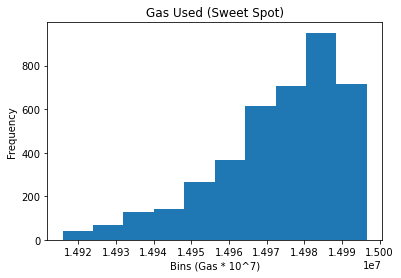

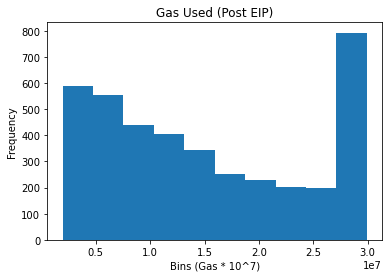

In [7]:
#display(suite_blx)

fig = plt.figure()
ax = plt.axes()
#plt.hist(suite_blx.gas_used)
suite_up=np.percentile(suite_blx.gas_used,90)
suite_lo=np.percentile(suite_blx.gas_used,10)

some_suite_blx=[x for x in suite_blx.gas_used if (x>suite_lo)&(x<suite_up)]


some_suite_blx=random_index_generator(some_suite_blx,4000)









post_up=np.percentile(block_data.gas_used,90)
post_lo=np.percentile(block_data.gas_used,10)

post_blx=[x for x in block_data.gas_used if (x<post_up)&(x>post_lo)]

plt.hist(some_suite_blx)
ax.set_title('Gas Used (Sweet Spot)')
ax.set_xlabel('Bins (Gas * 10^7)')
ax.set_ylabel('Frequency')
plt.savefig('gas_used_sweet_spot')
#display(block_data)


fig2 = plt.figure()
ax2 = plt.axes()
ax2.set_title('Gas Used (Post EIP)')
ax2.set_xlabel('Bins (Gas * 10^7)')
ax2.set_ylabel('Frequency')

plt.hist(post_blx)
plt.savefig('gas_used_post_eip')
#fig = plt.figure()
#ax = plt.axes()
#hist(suite_blx)
print(len(post_blx))

Get the gas used per block from the pre EIP data (takes like 5 minutes), because we dont have proper block data from this time period.

In [8]:
display(pre_geth)


my_blocks=list(set(pre_geth.block_number))
gas_used_in_block=[]

for i in my_blocks:
    current_itteration=pre_geth[pre_geth.block_number == i]
    gas_used_in_block.append(np.sum(current_itteration.receipt_gas_used))
    
pre_eip_gas_used=pd.DataFrame({'block_number':my_blocks,'gas_used': \
                               gas_used_in_block})
display(pre_eip_gas_used)

,hash,block_number,block_timestamp,receipt_gas_used,gas_price
0,0xc9d37faf9270c0aa1a553d4e53777cf1617a606d8a26...,12111333,2021-03-26 00:16:51 UTC,45764,129000000000
1,0xceeee703a7638bfa1eaa0c3d97f31fe211dfb77915e6...,12111413,2021-03-26 00:33:17 UTC,36601,168000000000
2,0x87007e41f34e2c1ea51fe9ff5bde4a039c70f2a218fe...,12111458,2021-03-26 00:42:19 UTC,21000,174000000000
3,0x497a2de3a8a8a2799ead2bb558ba072cbb50c1f2ab8a...,12111280,2021-03-26 00:06:07 UTC,154315,168211840178
4,0x548aa6b360f2b81f0ed437b35af5405dfce857069e71...,12111328,2021-03-26 00:15:32 UTC,21000,154000000000
...,...,...,...,...,...
6264787,0xac03a458748d87b1e03732c7a60f13d3f6278e2dfb84...,12088722,2021-03-22 12:53:38 UTC,21000,165000000000
6264788,0xa10fa129bc83a7d7b85391b7c85ae579b3ab59ef6fd0...,12088822,2021-03-22 13:15:19 UTC,21000,213000000000
6264789,0xa43bb8f1b1d77b3f9770311998bc667e4e393e022021...,12085526,2021-03-22 00:58:55 UTC,112866,181000000000
6264790,0x5a90c80b066cd7577c71ee1e891353535d6e5f16f75c...,12087380,2021-03-22 07:54:46 UTC,21000,6000000000


,block_number,gas_used
0,12085254,12505492
1,12085255,12494633
2,12085256,12501913
3,12085257,12490684
4,12085258,12493393
...,...,...
30603,12116287,12458589
30604,12116288,12455980
30605,12116289,12410905
30606,12116290,12450340


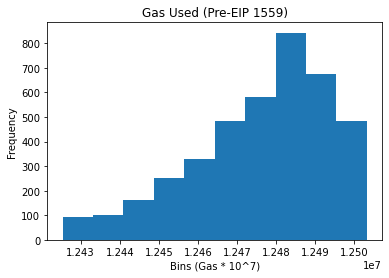

In [9]:

fig = plt.figure()
ax = plt.axes()

pre_gas_used=list(pre_eip_gas_used.gas_used)

oct_up=np.percentile(pre_gas_used,90)
oct_lo=np.percentile(pre_gas_used,10)

pre_gas_used=[x for x in pre_gas_used if (x<oct_up)&(x>oct_lo)]

smaller_pre_gas=random_index_generator(pre_gas_used,4000)



plt.hist(smaller_pre_gas)


ax.set_title('Gas Used (Pre-EIP 1559)')
ax.set_xlabel('Bins (Gas * 10^7)')
ax.set_ylabel('Frequency')
plt.savefig('gas_used_pre_eip')

In [10]:
#fig = plt.figure()
#ax = plt.axes()


#plt.hist(smaller_pre_gas,label='Gas Used (Pre-EIP 1559)',alpha=0.5)
#plt.hist(suite_blx,label='Gas Used (Pre EIP: Sweet Spot)',alpha=0.5)
#plt.hist(block_data.gas_used,label='Gas Used (Post-EIP 1559)')


#bins=np.linspace()


#ax.set_title('Gas Used for the Three Regimes')
#ax.set_xlabel('Bins (Gas * 10^7)')
#ax.set_ylabel('Frequency')
#ax.legend()
#len(smaller_pre_gas)==len(suite_blx)